In [1]:
# ✅ Repo clone
!git clone https://github.com/XTMay/R_DS.git
%cd R_DS

# ✅ Zaroori packages
!pip install -q pandas numpy pyjanitor


Cloning into 'R_DS'...
remote: Enumerating objects: 53, done.
remote: Total 53 (delta 0), reused 0 (delta 0), pack-reused 53 (from 2)
Receiving objects: 100% (53/53), 112.31 MiB | 18.45 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/R_DS
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 4.6 MB/s eta 0:00:00


In [2]:
import os
os.makedirs("data/clean", exist_ok=True)


In [5]:
import pandas as pd

# ✅ try latin1 encoding (zyada tar Windows/Excel exports isi me hote hain)
gdp_raw = pd.read_csv("data/GDP.csv", encoding="latin1")

# agar latin1 bhi kaam na kare to cp1252 try karna:
# gdp_raw = pd.read_csv("data/GDP.csv", encoding="cp1252")

gdp_raw.head()


,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Afghanistan,AFG,..,..,3.2558000087738,4.54397010803223,4.34319019317627,..,..,..,..,..,..,..
1,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Albania,ALB,..,3.4301700592041,3.43796992301941,3.96209001541138,3.61172008514404,3.15294480323792,3.91623997688293,3.3422999382019,3.02255988121033,2.74432992935181,..,..
2,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Algeria,DZA,..,..,6.17633008956909,6.50210857391357,5.73482370376587,5.81275129318237,5.57536554336548,6.1939172744751,5.51403284072876,4.74924659729004,5.61015701293945,..
3,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
4,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Andorra,AND,..,..,3.28034996986389,3.23707008361816,3.21708989143372,3.2467200756073,3.15060997009277,2.63213038444519,2.58397221565247,2.64728999137878,1.92790997028351,..


In [8]:
gdp_raw_head = gdp_raw.head(3)
list(gdp_raw.columns), gdp_raw_head


(['Series Name',
  'Series Code',
  'Country Name',
  'Country Code',
  '1990 [YR1990]',
  '2000 [YR2000]',
  '2015 [YR2015]',
  '2016 [YR2016]',
  '2017 [YR2017]',
  '2018 [YR2018]',
  '2019 [YR2019]',
  '2020 [YR2020]',
  '2021 [YR2021]',
  '2022 [YR2022]',
  '2023 [YR2023]',
  '2024 [YR2024]'],
                                          Series Name        Series Code  \
 0  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
 1  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
 2  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
 
   Country Name Country Code 1990 [YR1990]    2000 [YR2000]     2015 [YR2015]  \
 0  Afghanistan          AFG            ..               ..   3.2558000087738   
 1      Albania          ALB            ..  3.4301700592041  3.43796992301941   
 2      Algeria          DZA            ..               ..  6.17633008956909   
 
       2016 [YR2016]     2017 [YR2017]     2018 [YR2018]     2019 [YR

In [12]:
import pandas as pd
import numpy as np
import re

df = gdp_raw.copy()

# --- Step 1: Normalize column names (remove spaces, brackets etc.)
df.columns = [c.strip() for c in df.columns]

# --- Step 2: Year columns detect (like "1990 [YR1990]")
year_cols = [c for c in df.columns if re.match(r"^\d{4}", c)]

id_vars = ["Series Name", "Series Code", "Country Name", "Country Code"]

# --- Step 3: Melt wide → long
long = df.melt(
    id_vars=id_vars,
    value_vars=year_cols,
    var_name="year",
    value_name="value"
)

# --- Step 4: Clean year column → sirf number
long["year"] = long["year"].str.extract(r"^(\d{4})").astype(int)

# --- Step 5: Convert values to numeric
long["value"] = pd.to_numeric(long["value"], errors="coerce")

# --- Step 6: Filter GDP indicator (NY.GDP.MKTP.CD)
gdp_clean = long[long["Series Code"] == "NY.GDP.MKTP.CD"].copy()

# --- Step 7: Rename columns
gdp_clean = gdp_clean.rename(columns={
    "Country Name": "country",
    "Country Code": "country_code",
    "value": "gdp_current_usd"
})[["country", "country_code", "year", "gdp_current_usd"]]

# --- Step 8: Save clean file
gdp_clean.to_csv("data/clean/cleaned_gdp.csv", index=False)

print("Rows:", len(gdp_clean))
gdp_clean.head()


Rows: 0


,country,country_code,year,gdp_current_usd


In [13]:
# agar GDP wala code nahi hai to filter hata do
edu_clean = long.rename(columns={
    "Country Name": "country",
    "Country Code": "country_code",
    "value": "education_percent_gdp"
})[["country", "country_code", "year", "education_percent_gdp"]]

edu_clean.to_csv("data/clean/cleaned_education.csv", index=False)
print("Rows:", len(edu_clean))
edu_clean.head()


Rows: 3276


,country,country_code,year,education_percent_gdp
0,Afghanistan,AFG,1990,NaN
1,Albania,ALB,1990,NaN
2,Algeria,DZA,1990,NaN
3,American Samoa,ASM,1990,NaN
4,Andorra,AND,1990,NaN


In [14]:
import pandas as pd

edu = pd.read_csv("data/clean/cleaned_education.csv")

# Coverage by year
cov_year = edu.assign(have=edu["education_percent_gdp"].notna()) \
              .groupby("year")["have"].mean().mul(100).round(1) \
              .reset_index(name="coverage_percent")

# Coverage by country (last 10 saal ka average)
last10 = edu["year"].max() - 9
cov_ctry = (edu[edu["year"] >= last10]
            .assign(have=edu["education_percent_gdp"].notna())
            .groupby("country")["have"].mean().mul(100).round(1)
            .reset_index(name="coverage_percent")) \
            .sort_values("coverage_percent", ascending=False)

cov_year.head(), cov_ctry.head(10)


(   year  coverage_percent
 0  1990              22.7
 1  2000              63.0
 2  2015              78.0
 3  2016              78.4
 4  2017              79.5,
                                          country  coverage_percent
 235                                     Suriname              90.0
 240                                     Tanzania              90.0
 239                                   Tajikistan              90.0
 241                                     Thailand              90.0
 4                                        Algeria              90.0
 36                                      Cambodia              90.0
 80                                          Fiji              90.0
 206                                        Samoa              90.0
 205                                       Rwanda              90.0
 65   East Asia & Pacific (excluding high income)              90.0)

In [15]:
edu_strict = edu.dropna(subset=["education_percent_gdp"]).copy()
edu_strict.to_csv("data/clean/education_strict.csv", index=False)
len(edu_strict)


1960

In [17]:
import pandas as pd
import re

ref_raw = pd.read_csv("data/RefugeeData.csv", encoding="latin1")
print(ref_raw.columns.tolist())
ref_raw.head(3)


['Year', 'Country of Asylum', 'Country of Origin', 'Country of Asylum ISO', 'Country of Origin ISO', 'Refugees', 'Returned Refugees', 'Asylum Seekers', 'IDPs', 'Returned IDPs', 'Stateless', 'HST', 'OOC']


,Year,Country of Asylum,Country of Origin,Country of Asylum ISO,Country of Origin ISO,Refugees,Returned Refugees,Asylum Seekers,IDPs,Returned IDPs,Stateless,HST,OOC
0,1991,-,Afghanistan,-,AFG,6306301,178270,0,0,0,0,0,0
1,1991,-,Albania,-,ALB,3542,220,0,0,0,0,0,0
2,1991,-,Algeria,-,DZA,55,0,0,0,0,0,0,0


In [19]:
import pandas as pd

ref_raw = pd.read_csv("data/RefugeeData.csv", encoding="latin1")

# --- Step 1: sirf relevant columns lo
ref_clean = ref_raw.rename(columns={
    "Year": "year",
    "Country of Asylum": "country_asylum",
    "Country of Origin": "country_origin",
    "Country of Asylum ISO": "asylum_iso",
    "Country of Origin ISO": "origin_iso",
    "Refugees": "refugees"
})[["year", "country_asylum", "asylum_iso",
    "country_origin", "origin_iso", "refugees"]]

# --- Step 2: types fix karo
ref_clean["year"] = pd.to_numeric(ref_clean["year"], errors="coerce")
ref_clean["refugees"] = pd.to_numeric(ref_clean["refugees"], errors="coerce")

# --- Step 3: clean text
ref_clean["country_asylum"] = ref_clean["country_asylum"].astype(str).str.strip()
ref_clean["country_origin"] = ref_clean["country_origin"].astype(str).str.strip()

# --- Step 4: save
ref_clean.to_csv("data/clean/cleaned_refugees.csv", index=False)

print("Rows:", len(ref_clean))
ref_clean.head(10)


Rows: 6196


,year,country_asylum,asylum_iso,country_origin,origin_iso,refugees
0,1991,-,-,Afghanistan,AFG,6306301
1,1991,-,-,Albania,ALB,3542
2,1991,-,-,Algeria,DZA,55
3,1991,-,-,Angola,AGO,381638
4,1991,-,-,Egypt,EGY,98
5,1991,-,-,Argentina,ARG,196
6,1991,-,-,Bahrain,BHR,52
7,1991,-,-,Burundi,BDI,223942
8,1991,-,-,Bangladesh,BGD,613
9,1991,-,-,Bhutan,BTN,9504


In [20]:
import pandas as pd

# 1) Load clean files
edu = pd.read_csv("data/clean/education_strict.csv")        # ya education_interpolated.csv
ref = pd.read_csv("data/clean/cleaned_refugees.csv")

# 2) Refugee rows where origin code present
ref_o = ref.dropna(subset=["origin_iso"]).copy()

# 3) Merge on ISO3 + year  (origin country ↔ education spend)
merged_origin = pd.merge(
    edu, ref_o,
    left_on=["country_code", "year"],   # education side ISO
    right_on=["origin_iso", "year"],    # refugee side ISO
    how="inner",
    suffixes=("_edu", "_ref")
)

# 4) Useful columns only
merged_origin = merged_origin[[
    "year",
    "country_edu" if "country_edu" in merged_origin.columns else "country",  # some envs rename after merge
    "country_code",
    "education_percent_gdp",
    "country_origin", "origin_iso",
    "refugees"
]].rename(columns={
    "country_edu": "country_education",
    "country": "country_education"
})

# 5) Save
merged_origin.to_csv("data/clean/merged_origin_edu_refugees.csv", index=False)
len(merged_origin), merged_origin.head()


(1433,
    year country_education country_code  education_percent_gdp country_origin  \
 0  2000           Albania          ALB                3.43017        Albania   
 1  2000            Angola          AGO                2.60753         Angola   
 2  2000         Argentina          ARG                4.58031      Argentina   
 3  2000           Armenia          ARM                2.77273        Armenia   
 4  2000         Australia          AUS                4.75934      Australia   
 
   origin_iso  refugees  
 0        ALB      6801  
 1        AGO    433756  
 2        ARG       608  
 3        ARM      5787  
 4        AUS         0  )

In [21]:
# 1) Filter asylum ISO present
ref_a = ref.dropna(subset=["asylum_iso"]).copy()

# 2) Merge on ISO3 + year (host country ↔ education spend)
merged_asylum = pd.merge(
    edu, ref_a,
    left_on=["country_code", "year"],
    right_on=["asylum_iso", "year"],
    how="inner",
    suffixes=("_edu", "_ref")
)

merged_asylum = merged_asylum[[
    "year",
    "country_edu" if "country_edu" in merged_asylum.columns else "country",
    "country_code",
    "education_percent_gdp",
    "country_asylum", "asylum_iso",
    "refugees"
]].rename(columns={"country_edu":"country_education", "country":"country_education"})

merged_asylum.to_csv("data/clean/merged_asylum_edu_refugees.csv", index=False)
len(merged_asylum), merged_asylum.head()


(0,
 Empty DataFrame
 Columns: [year, country_education, country_code, education_percent_gdp, country_asylum, asylum_iso, refugees]
 Index: [])

In [22]:
for p in [
    "data/clean/education_strict.csv",
    "data/clean/cleaned_refugees.csv",
    "data/clean/merged_origin_edu_refugees.csv",
    "data/clean/merged_asylum_edu_refugees.csv"
]:
    try:
        df = pd.read_csv(p, nrows=5)
        print("OK:", p, "cols:", df.columns.tolist()[:6], "… rows sample:", len(df))
    except Exception as e:
        print("Issue in", p, "→", e)


OK: data/clean/education_strict.csv cols: ['country', 'country_code', 'year', 'education_percent_gdp'] … rows sample: 5
OK: data/clean/cleaned_refugees.csv cols: ['year', 'country_asylum', 'asylum_iso', 'country_origin', 'origin_iso', 'refugees'] … rows sample: 5
OK: data/clean/merged_origin_edu_refugees.csv cols: ['year', 'country_education', 'country_code', 'education_percent_gdp', 'country_origin', 'origin_iso'] … rows sample: 5
OK: data/clean/merged_asylum_edu_refugees.csv cols: ['year', 'country_education', 'country_code', 'education_percent_gdp', 'country_asylum', 'asylum_iso'] … rows sample: 0


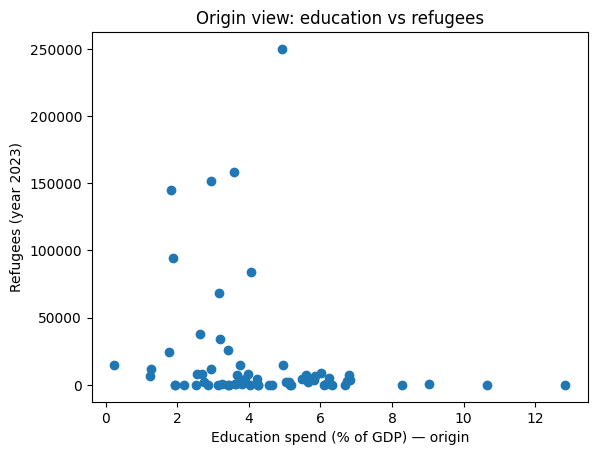

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

mo = pd.read_csv("data/clean/merged_origin_edu_refugees.csv")
latest = mo["year"].max()
sample = mo[mo["year"]==latest].dropna(subset=["education_percent_gdp","refugees"])

plt.figure()
plt.scatter(sample["education_percent_gdp"], sample["refugees"])
plt.xlabel("Education spend (% of GDP) — origin")
plt.ylabel(f"Refugees (year {latest})")
plt.title("Origin view: education vs refugees")
plt.show()


In [24]:
ma = pd.read_csv("data/clean/merged_asylum_edu_refugees.csv")
latest = ma["year"].max()
top_hosts = (ma[ma["year"]==latest]
             .groupby(["country_asylum"], as_index=False)["refugees"].sum()
             .sort_values("refugees", ascending=False).head(10))
top_hosts


,country_asylum,refugees
